In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
#For ignoring warnings
import warnings
warnings . simplefilter(action='ignore')  

In [3]:
# import dataset

data = pd.read_csv(r'C:\Users\parik\OneDrive\Desktop\diabities\diabetes.csv')
df = pd.DataFrame(data.drop('Pregnancies',axis = 1))
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
#getting some information about the datafram
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#number of null values in our dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#To check number of uniqe elements in each columns.
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

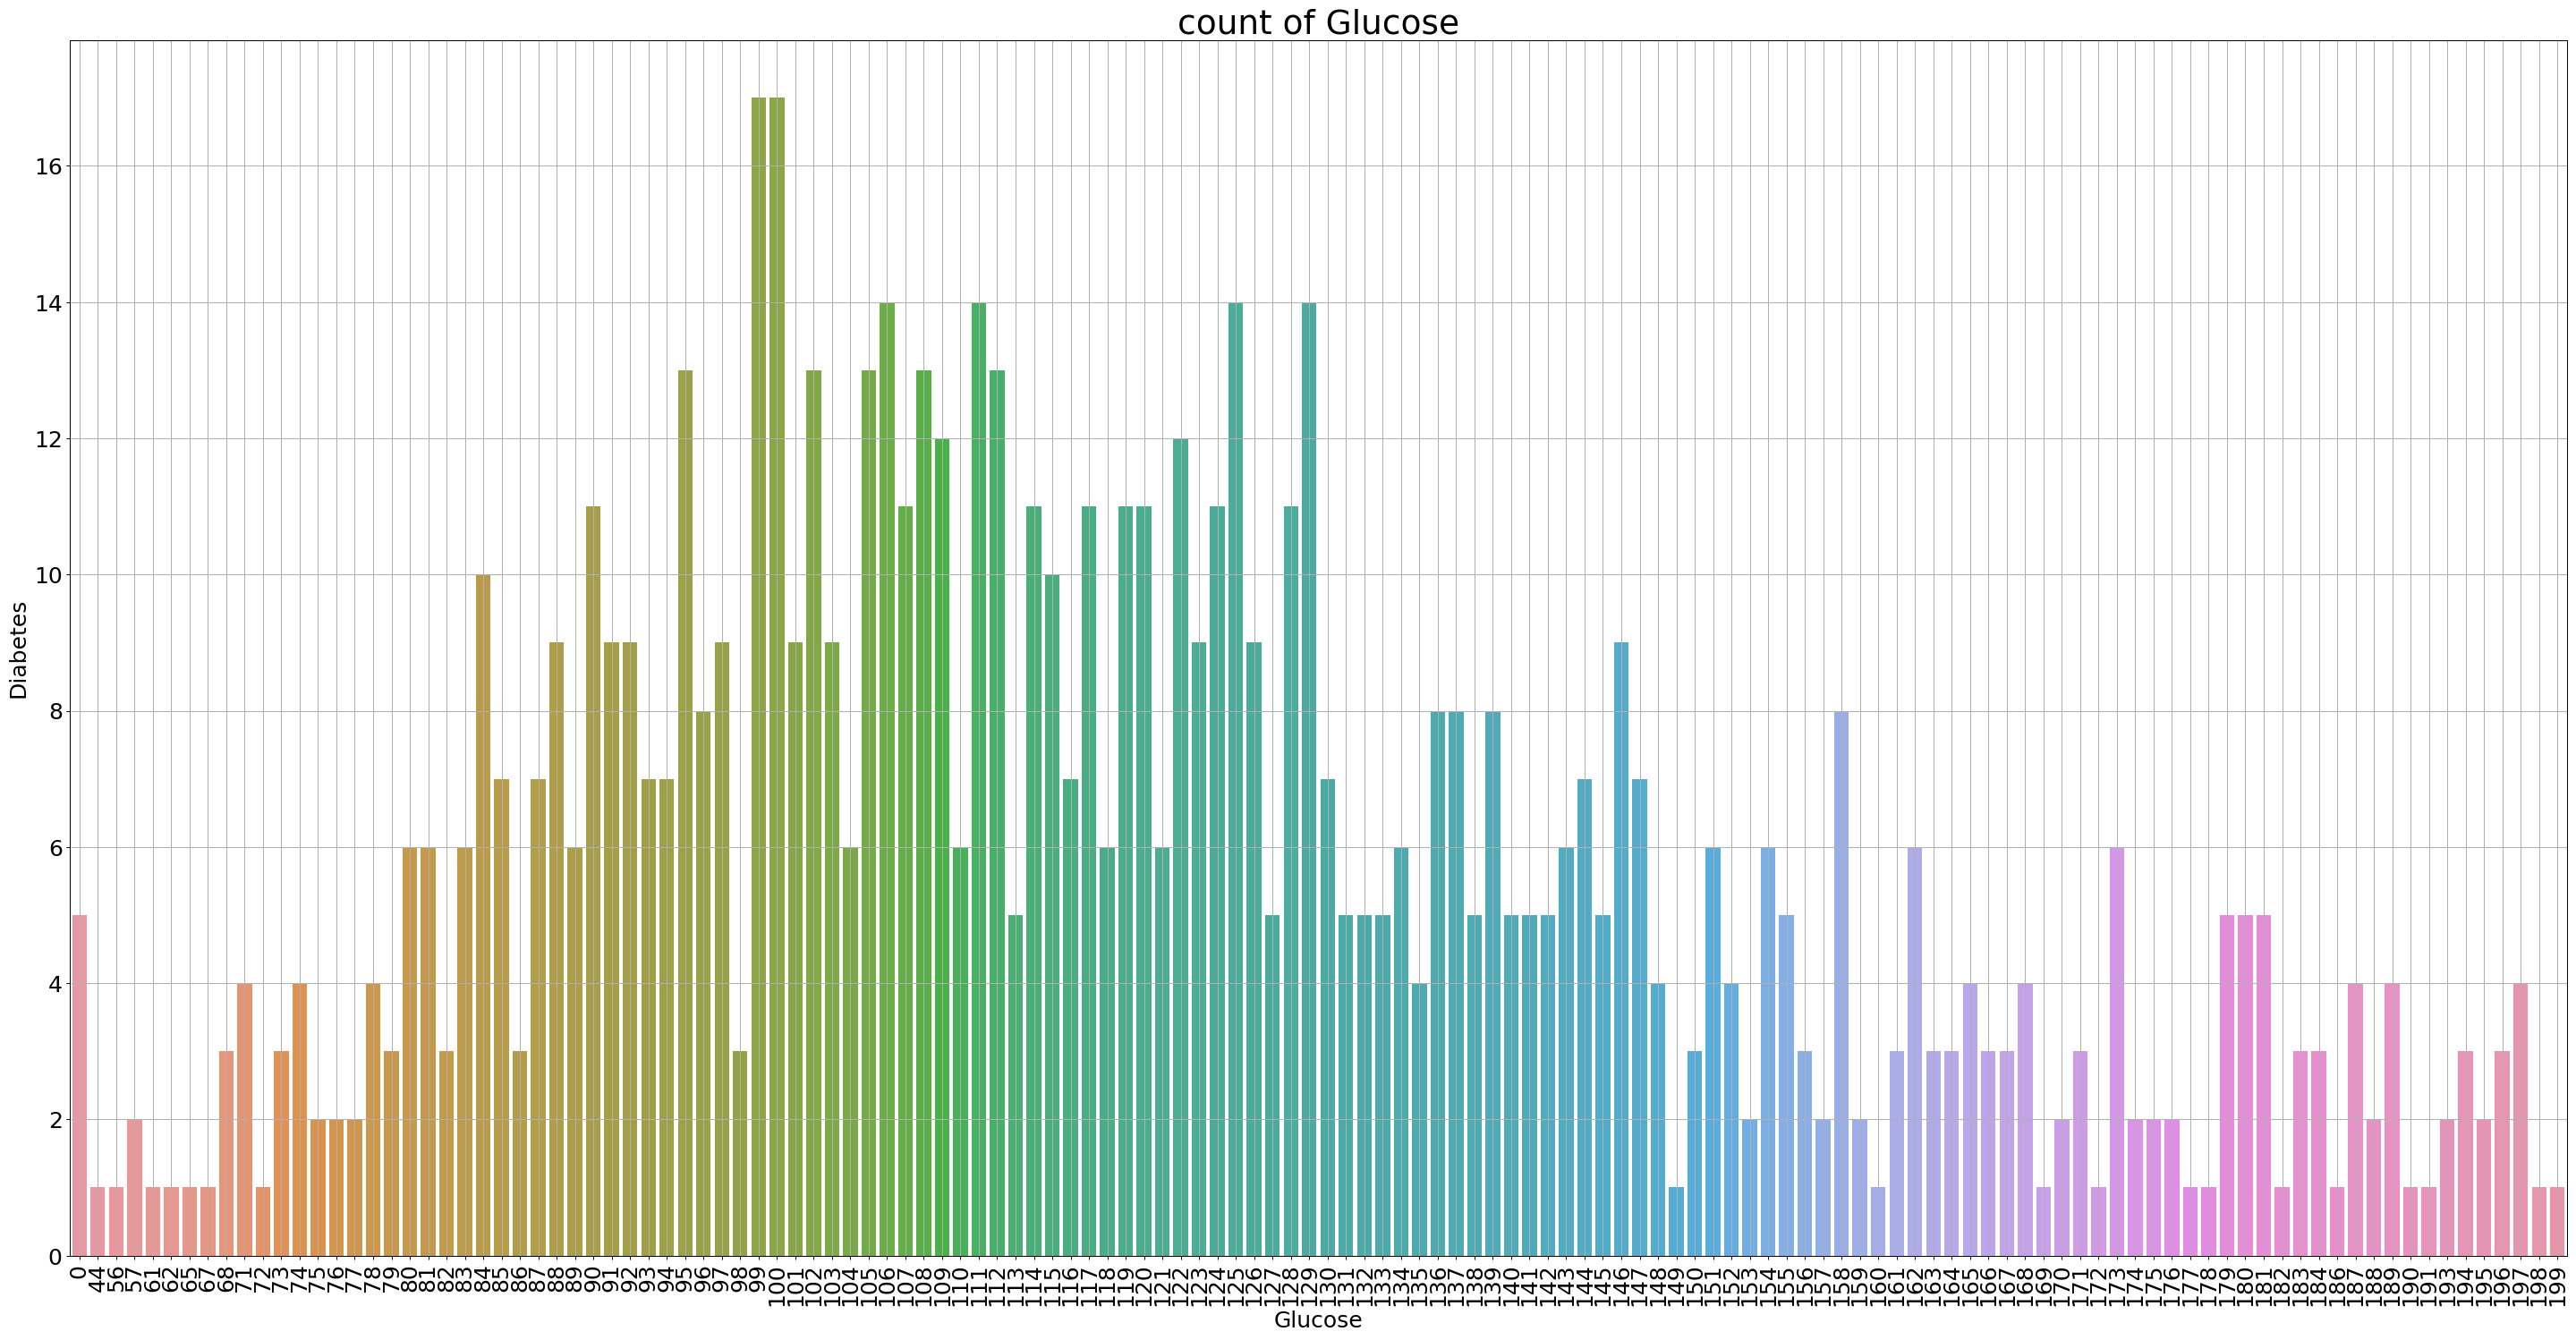

In [7]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='Glucose',data=data)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Glucose',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of Glucose',fontsize=30)
plt.grid()

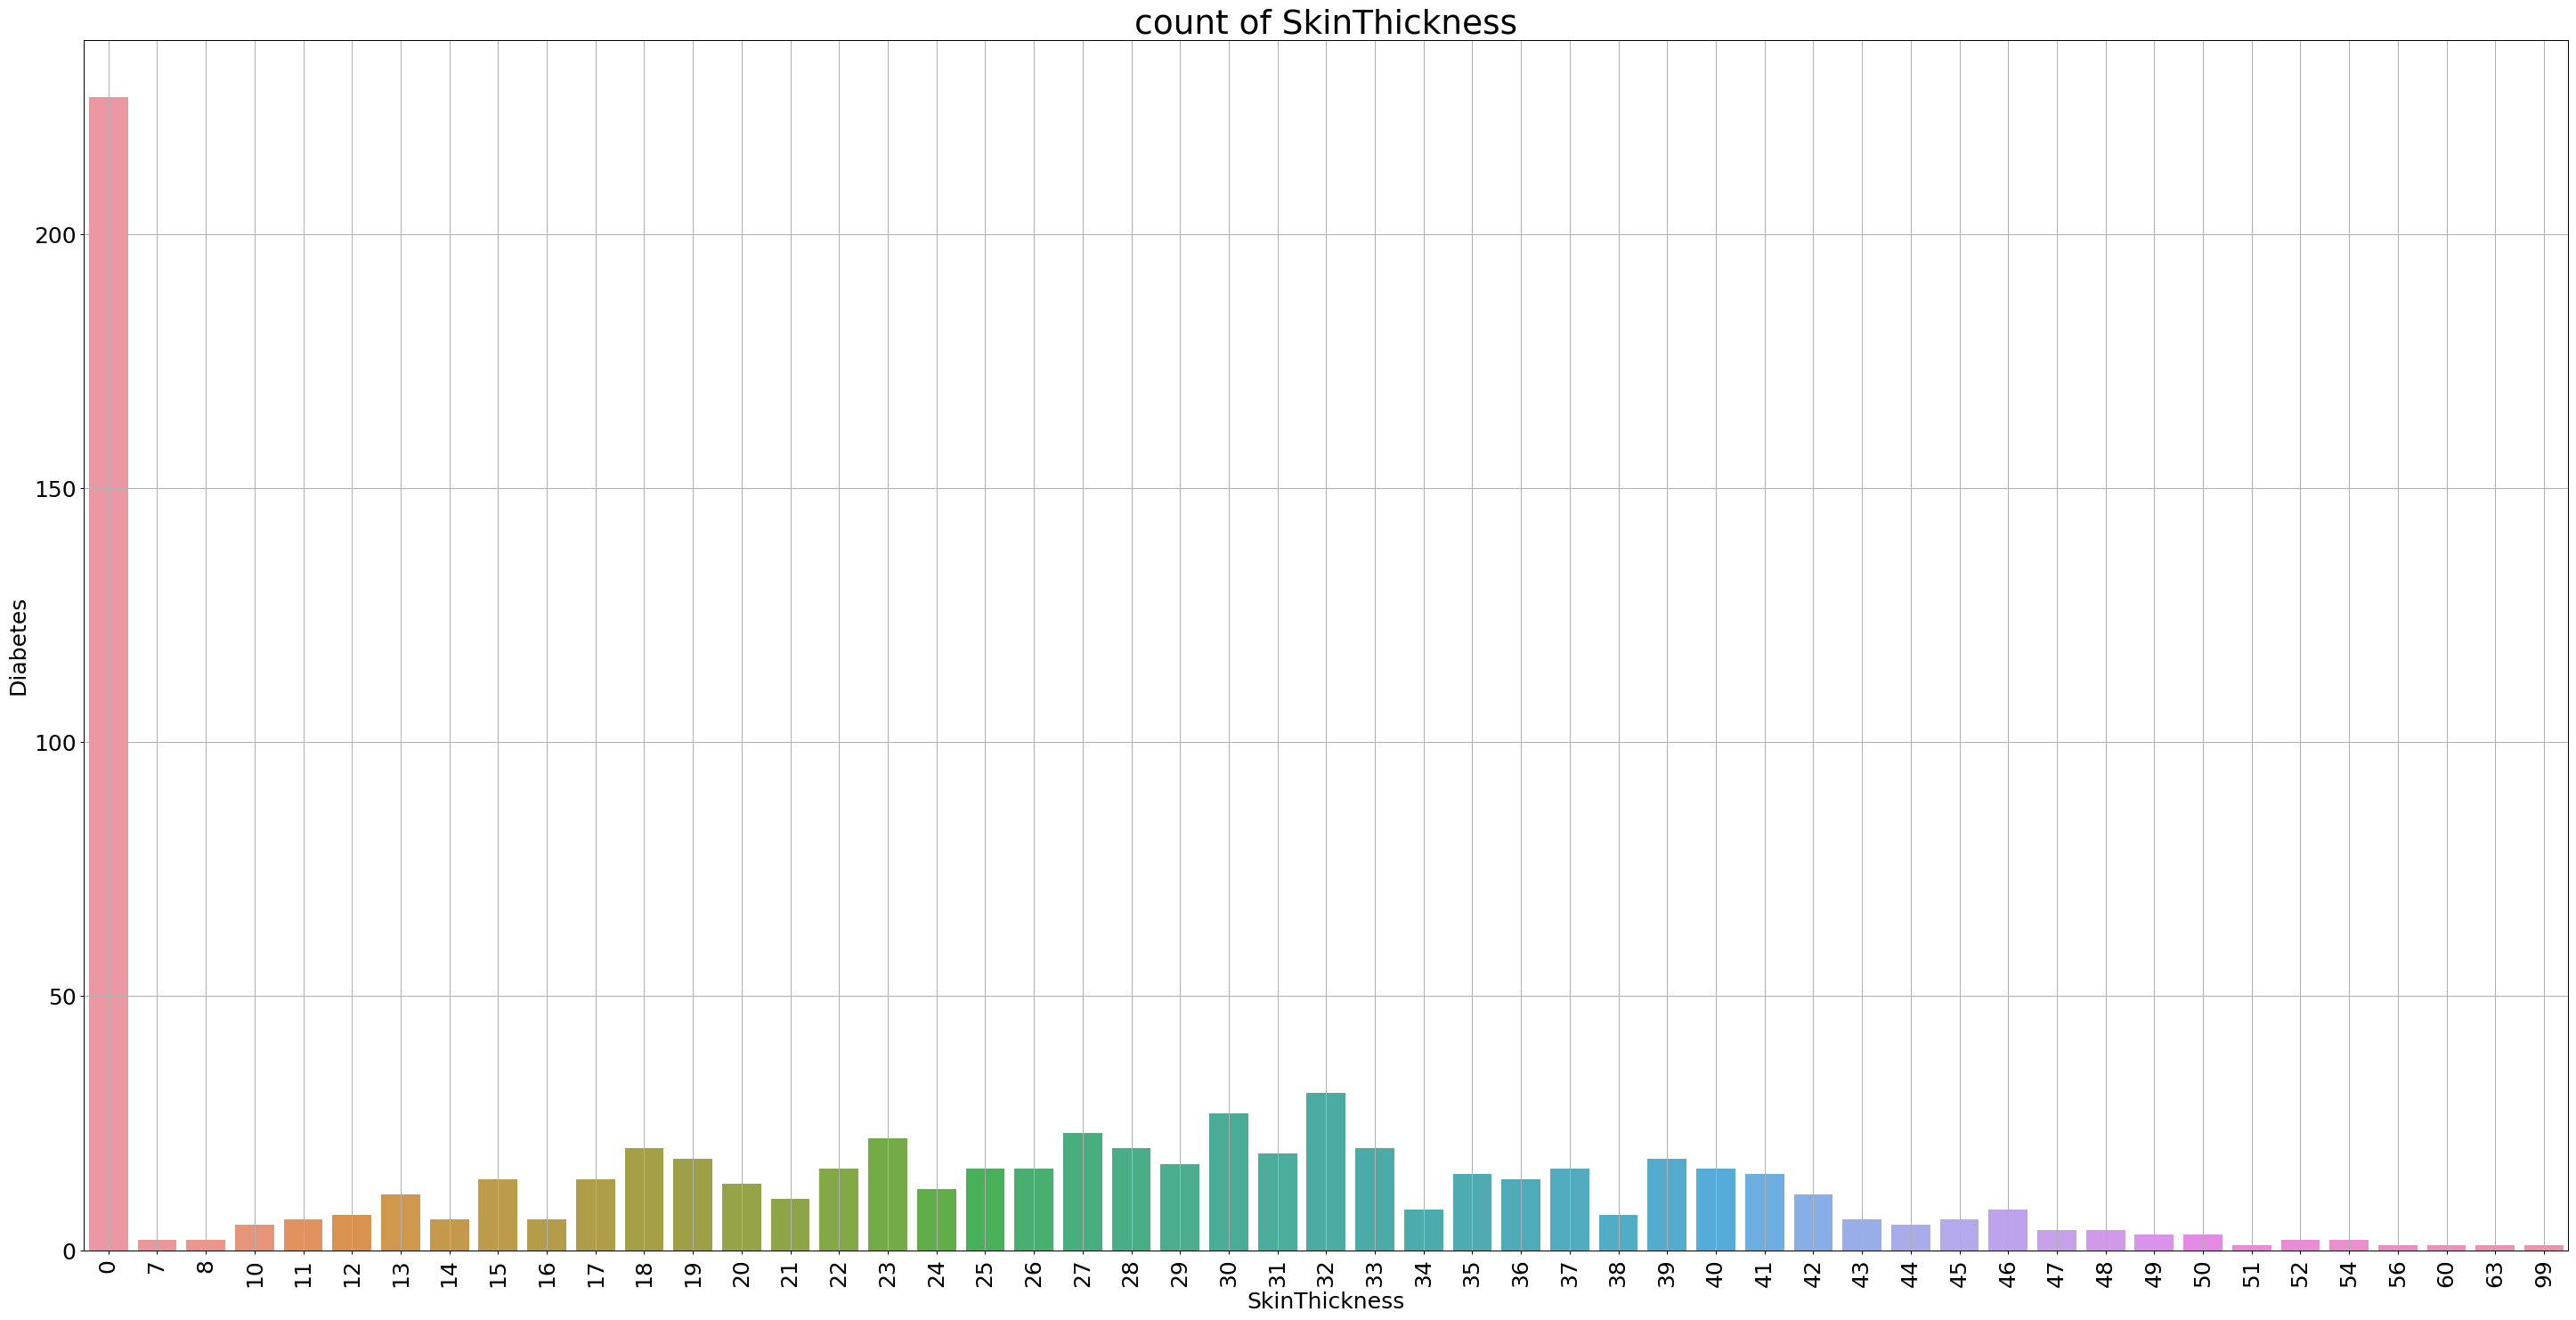

In [8]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='SkinThickness',data=data)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('SkinThickness',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of SkinThickness',fontsize=30)
plt.grid()

In [9]:
df1=data[data['SkinThickness']>0]
df1=df1[df1['SkinThickness']<90]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [10]:
df2=df1.dropna(how="any")
df2.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Glucose vs Outcome')

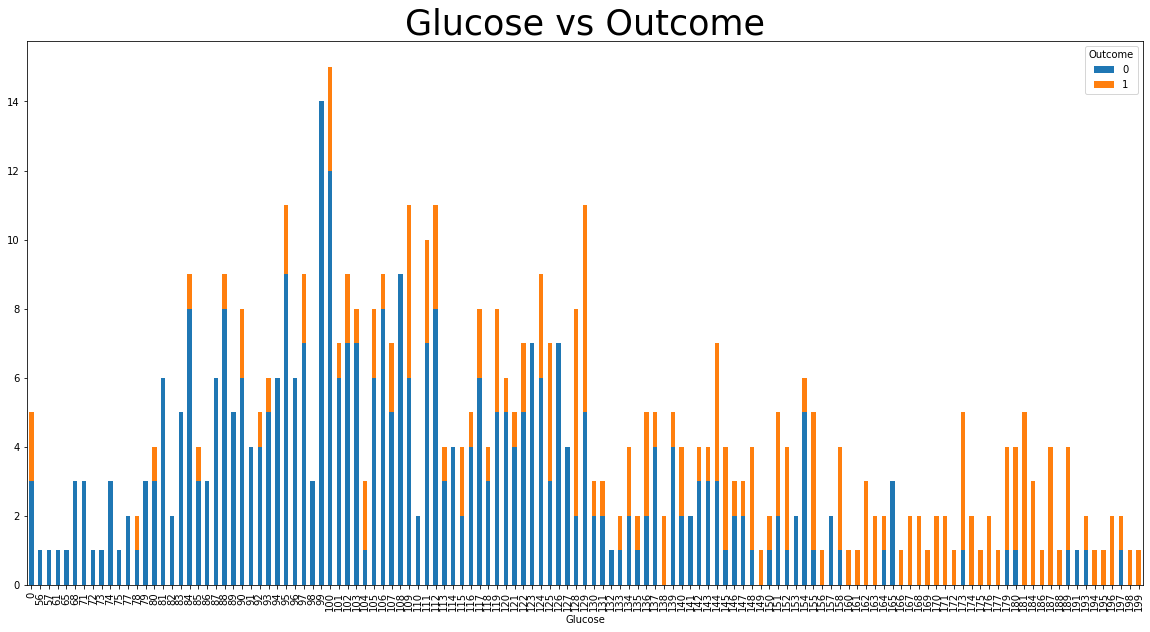

In [11]:
df2.groupby(['Glucose', 'Outcome']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Glucose vs Outcome', fontsize=35)


Text(0.5, 1.0, 'BMI vs Outcome')

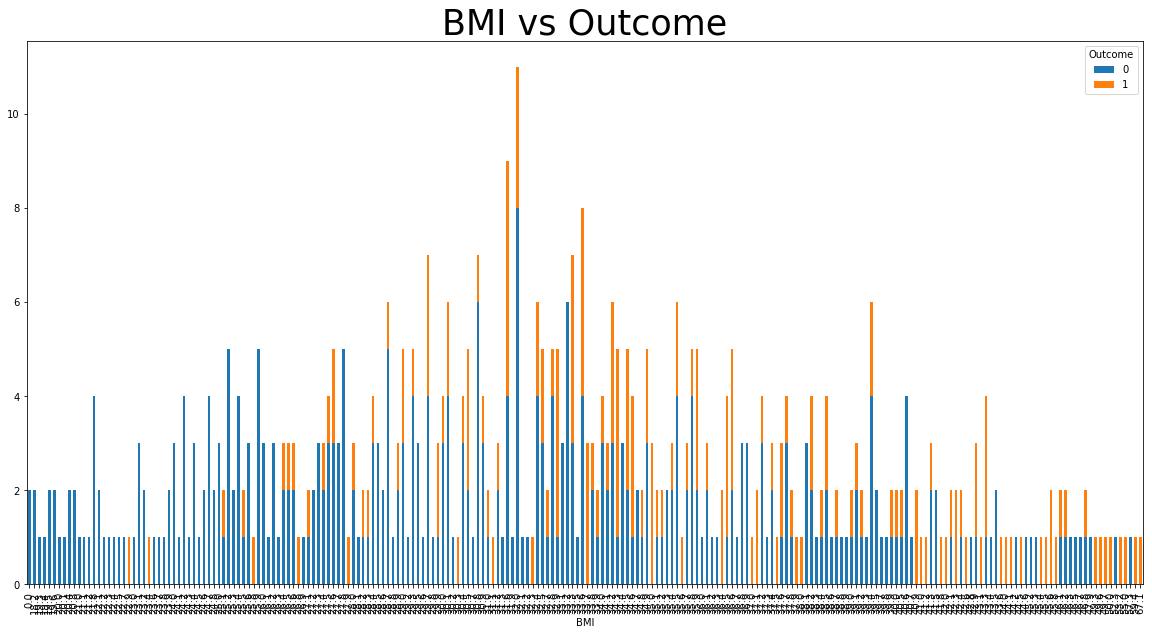

In [12]:
df2.groupby(['BMI', 'Outcome']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('BMI vs Outcome', fontsize=35)

Text(0.5, 1.0, 'Age vs Outcome')

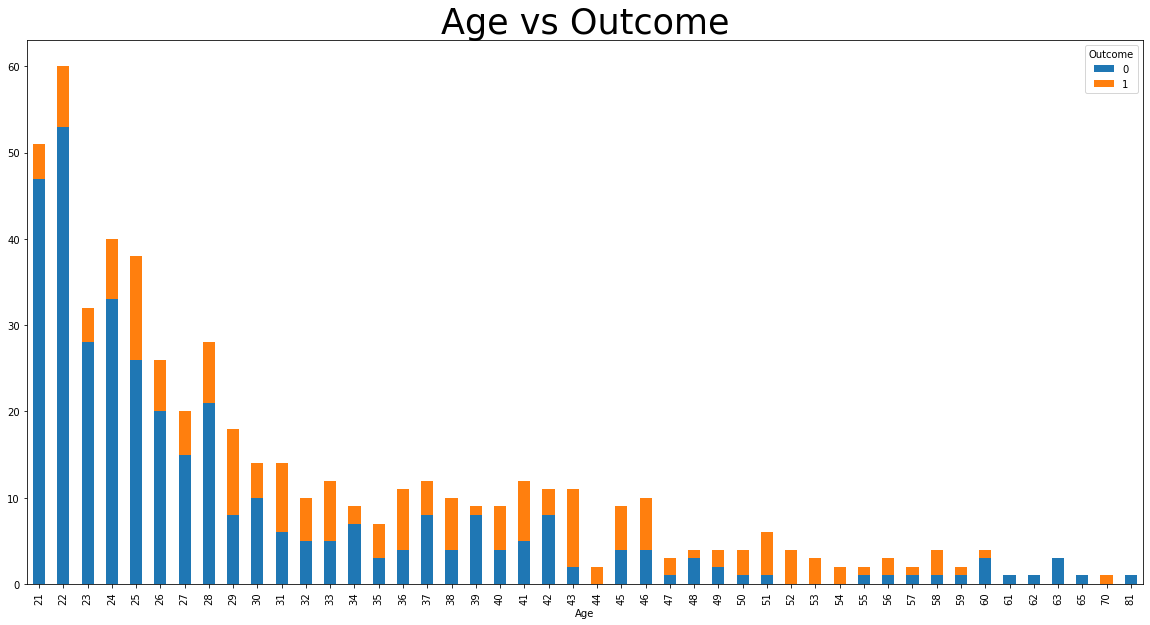

In [13]:
df2.groupby(['Age', 'Outcome']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Age vs Outcome', fontsize=35)

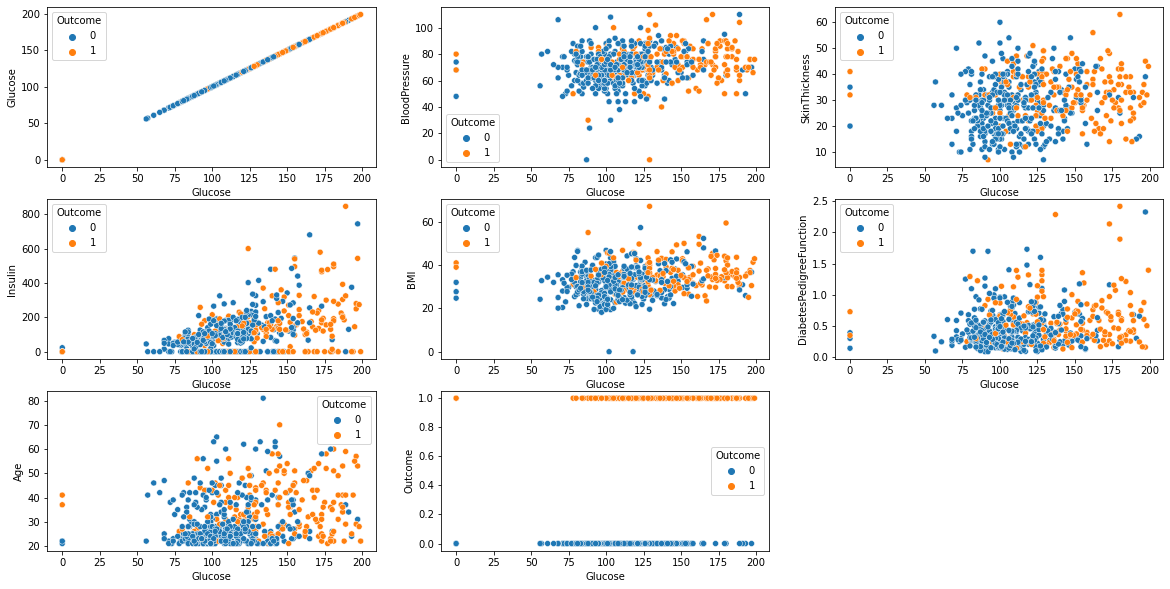

In [14]:
# distribuation

fig=plt.figure(figsize=(20,10))
for i,col in enumerate(df):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot(x='Glucose',y=col,hue='Outcome',data=df2)

In [15]:
df . describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [17]:
x = pd.DataFrame(df , columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']).values  #array 
y = df . Outcome . values . reshape(-1 , 1)

x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.3 , random_state=0)

In [18]:
x

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:

k = 30
acc = np . zeros(k) 

for i in range(1 , k+1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf . fit(x_train , y_train . ravel())
    y_pred = clf . predict(x_test)
    acc[i-1]=metrics . accuracy_score(y_test , y_pred)

acc

## fold   7   -   10

array([0.61038961, 0.71861472, 0.70995671, 0.74025974, 0.74458874,
       0.72727273, 0.75324675, 0.75324675, 0.75324675, 0.75324675,
       0.74891775, 0.74891775, 0.73593074, 0.73160173, 0.73593074,
       0.74025974, 0.74025974, 0.74025974, 0.73593074, 0.72727273,
       0.71861472, 0.71861472, 0.72727273, 0.71428571, 0.73160173,
       0.73593074, 0.74458874, 0.73160173, 0.73160173, 0.73160173])

In [20]:
print(np . max(acc))
print(np . min(acc))

0.7532467532467533
0.6103896103896104


In [21]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 50):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

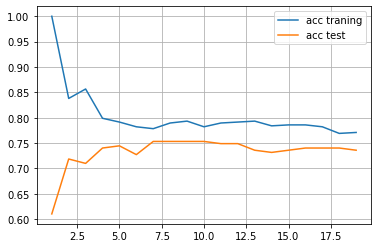

In [22]:
training_acc = []
test_acc= []


neighbor_srtingg = range(1 , 20)

for n_neighbors in neighbor_srtingg :
    knn= KNeighborsClassifier(n_neighbors=n_neighbors)
    knn . fit(x_train , y_train . ravel())
    training_acc . append (knn . score(x_train , y_train))
    test_acc . append (knn . score(x_test , y_test))

plt . plot(neighbor_srtingg , training_acc , label='acc traning')
plt . plot(neighbor_srtingg , test_acc , label = 'acc test' )
plt . legend()
plt . xticks()
plt . yticks()
plt . grid()

In [23]:

K = []
training = []
test = []
scores = {}
  
for k in range(2, 50):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

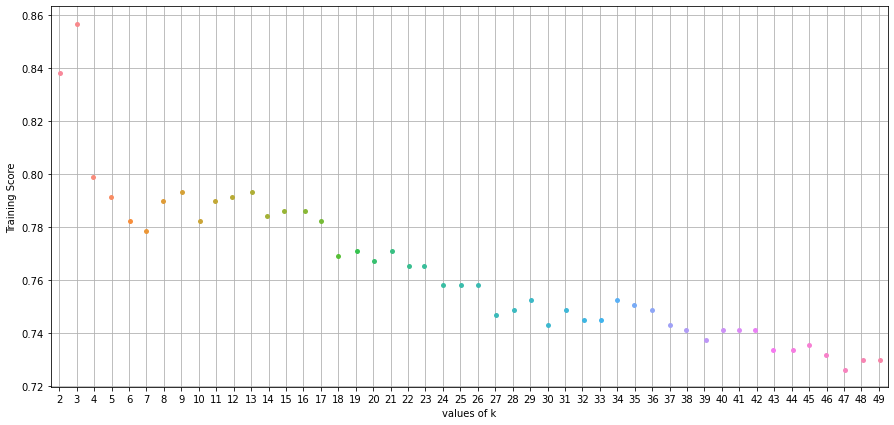

In [24]:
plt . figure(figsize=(15 , 7))
ax = sns.stripplot(x = K,y = training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
plt  . grid()
plt.show()

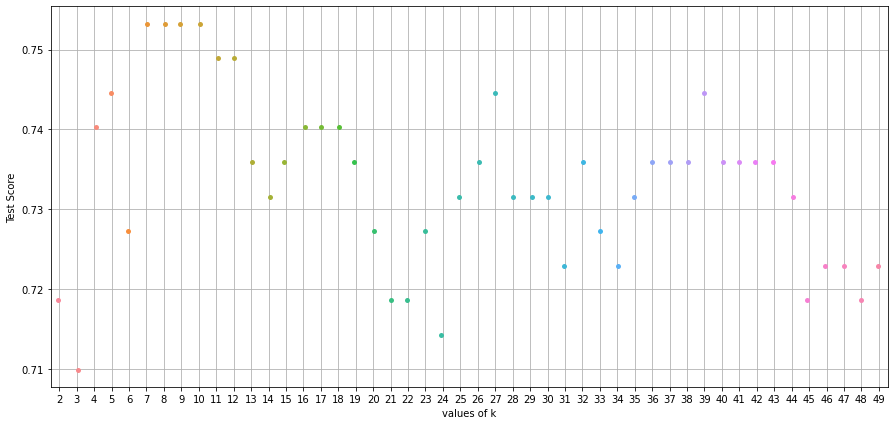

In [25]:
plt . figure(figsize=(15 , 7))
ax = sns.stripplot(x = K, y = test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt . grid()
plt.show()

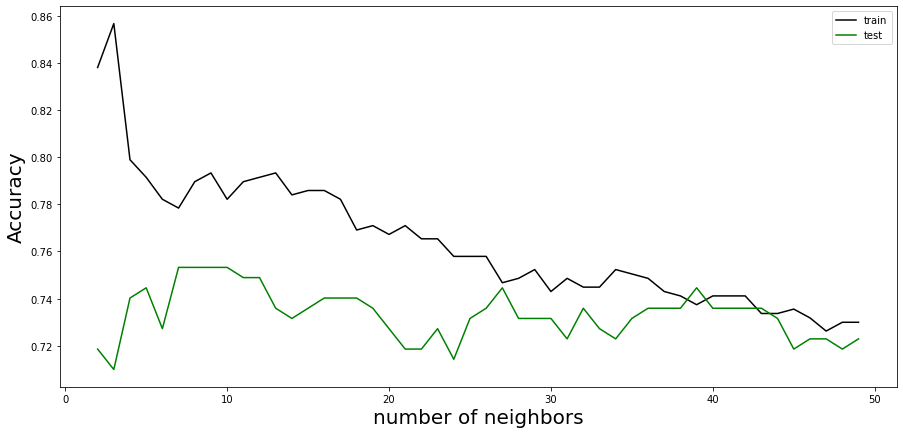

In [26]:
plt . figure(figsize=(15 , 7))
plt.plot(K, training, color ='k' , label='train')
plt.plot(K, test, color ='g' ,label='test')
plt . legend()
plt . xlabel('number of neighbors' , size=(20))
plt . ylabel('Accuracy', size=(20))
plt.show()

# For overlapping scatter plots

In [27]:
knn = KNeighborsClassifier(10)
knn . fit(x_train , y_train)
y_pred = knn . predict(x_test)
print('acc:',metrics . accuracy_score(y_test , y_pred))

acc: 0.7532467532467533


Text(0.5, 15.0, 'Predicted label')

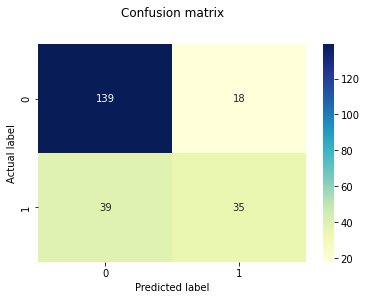

In [28]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

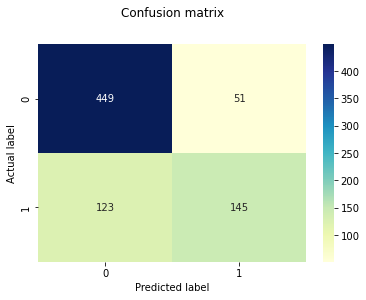

In [29]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y , knn . predict(x))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
param_grid = {'n_neighbors':np.arange(1,50 , 2) ,
             'weights' : ['uniform' , 'distance']}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(x,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7552973342447027
Best Parameters: {'n_neighbors': 23, 'weights': 'distance'}


In [31]:
knn = KNeighborsClassifier(23 , weights = 'distance' )
knn . fit(x_train , y_train)
y_pred = knn . predict(x_test)
print('acc:',metrics . accuracy_score(y_test , y_pred))

acc: 0.7359307359307359


Text(0.5, 15.0, 'Predicted label')

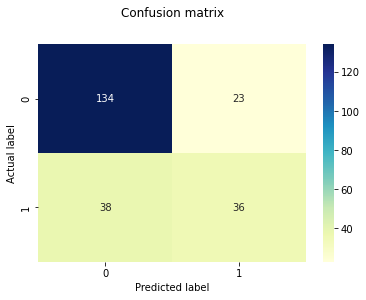

In [32]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

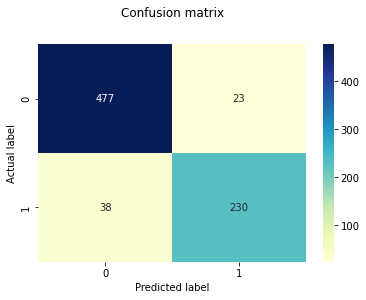

In [33]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y , knn . predict(x))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
#finally

In [35]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [36]:
x = df . drop('Outcome' , axis=1)
y = df . Outcome

x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.25 , random_state=0)

knn = KNeighborsClassifier(10)
knn . fit(x , y)

KNeighborsClassifier(n_neighbors=10)

In [37]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

df2 = pd . DataFrame({ 
                    'Glucose':[80] ,
                    'BloodPressure':[72] ,
                     'SkinThickness':[0] ,
                     'Insulin':[23] , 
                     'BMI':[0.5]  ,
                      'DiabetesPedigreeFunction':[1] ,
                     'Age':[30] ,
                     'Outcome':[0] })

In [38]:
df3 =df.append(df2)
df3.reset_index(inplace = True)

In [39]:
df3.drop('index' ,axis = 1 , inplace = True)

In [40]:
df3

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1
767,93,70,31,0,30.4,0.315,23,0


In [41]:
x_train = df3.drop('Outcome' , axis =1)[:768]
y_train = df3.Outcome [:768] . values . reshape(-1,1)

In [42]:
x_test = df3.drop('Outcome' , axis=1) [768:]

In [43]:
knn.fit(x_train , y_train . ravel())

KNeighborsClassifier(n_neighbors=10)

In [44]:
y_pred =knn.predict(x_test)

In [45]:
y_pred

array([0], dtype=int64)

In [61]:
x = pd.DataFrame(df , columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']).values  #array 
y = df . Outcome . values . reshape(-1 , 1)
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.3 , random_state=0)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_predd = dtc.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cf1 = confusion_matrix(y_predd,y_test)
print(cf1)
print(classification_report(y_predd, y_test))
print( "accuracy score: ", accuracy_score(y_predd, y_test))


[[124  34]
 [ 33  40]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       158
           1       0.54      0.55      0.54        73

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.71      0.71      0.71       231

accuracy score:  0.70995670995671


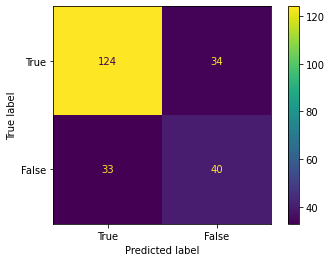

In [65]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf1, display_labels = [True, False])
cm_display.plot()
plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.predict(x_test[0].reshape(1,-1))
predictions = logisticRegr.predict(x_test)

In [71]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.7748917748917749


In [73]:
cf2 = confusion_matrix(predictions,y_test)
print(cf2)
print(classification_report(predictions, y_test))
print( "accuracy score: ", accuracy_score(predictions, y_test))

[[139  34]
 [ 18  40]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       173
           1       0.54      0.69      0.61        58

    accuracy                           0.77       231
   macro avg       0.71      0.75      0.72       231
weighted avg       0.80      0.77      0.78       231

accuracy score:  0.7748917748917749


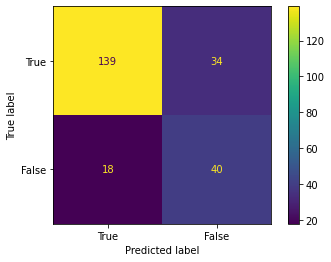

In [74]:
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cf2, display_labels = [True, False])
cm_display1.plot()
plt.show()